Import libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ks

In [ ]:
from sklearn.linear_model import LinearRegression , LogisticRegressionCV , LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score,f1_score
from sklearn import pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize , StandardScaler , minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


Load Dataset

In [ ]:

data=pd.read_excel("/content/sample_data/Raisin_Dataset.xlsx")

Preprocessing

In [ ]:

# Take sample of first five rows
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
# Basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
# Is any null value present in the dataset
data.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [ ]:
# is any duplicated value present in the dataset
data.duplicated().sum()

np.int64(0)

In [ ]:
#  is any zero value present in the columns
a=[]
for i in data.columns :
  a.append(data[data[i]==0].shape[0])
print(pd.Series(a,index=data.columns))

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [ ]:
# Statistical information of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [ ]:
#  calculates mean of columns based on target variable
data.groupby("Class").mean()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Class,,,,,,,
Besni,112194.788889,509.000652,279.623674,0.821125,116675.824444,0.691242,1348.127036
Kecimen,63413.466667,352.859249,229.352592,0.741960,65696.355556,0.707774,983.686236


In [ ]:
# Encode the Target column into binary from using label encoder
label=LabelEncoder()
data["Class"]=label.fit_transform(data["Class"])

In [ ]:
data.groupby("Class").mean()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Class,,,,,,,
0,112194.788889,509.000652,279.623674,0.821125,116675.824444,0.691242,1348.127036
1,63413.466667,352.859249,229.352592,0.741960,65696.355556,0.707774,983.686236


In [ ]:
# Sc=StandardScaler()
# data["Area"]=Sc.fit_transform(data[["Area"]])
# data["ConvexArea"]=Sc.fit_transform(data[["ConvexArea"]])

In [ ]:
# scaled=minmax_scale()
data["Area"]=minmax_scale(data[["Area"]])
data["ConvexArea"]=minmax_scale(data[["ConvexArea"]])
data["MajorAxisLength"]=minmax_scale(data[["MajorAxisLength"]])
data["MinorAxisLength"]=minmax_scale(data[["MinorAxisLength"]])
data["Perimeter"]=minmax_scale(data[["Perimeter"]])

In [ ]:
# Statistical information of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,0.297706,0.186026,0.000000,0.161981,0.255247,0.379859,1.000000
MajorAxisLength,900.0,0.266050,0.150370,0.000000,0.155267,0.236080,0.348025,1.000000
MinorAxisLength,900.0,0.317810,0.143414,0.000000,0.216317,0.298761,0.390682,1.000000
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,0.258044,0.161733,0.000000,0.140331,0.220218,0.326235,1.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,0.263067,0.131701,0.000000,0.167095,0.240747,0.331612,1.000000
Class,900.0,0.500000,0.500278,0.000000,0.000000,0.500000,1.000000,1.000000


In [ ]:
data.groupby("Class").mean()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Class,,,,,,,
0,0.414041,0.367222,0.389922,0.821125,0.359162,0.691242,0.350729
1,0.181372,0.164877,0.245698,0.741960,0.156925,0.707774,0.175406


## Exploratory Data Analysis (EDA)


Pie Chart

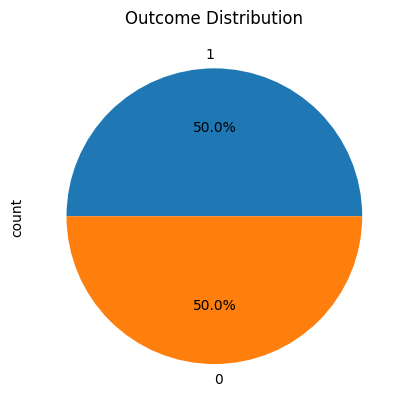

In [ ]:
data['Class'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Outcome Distribution')
plt.show()

Scatter Plot

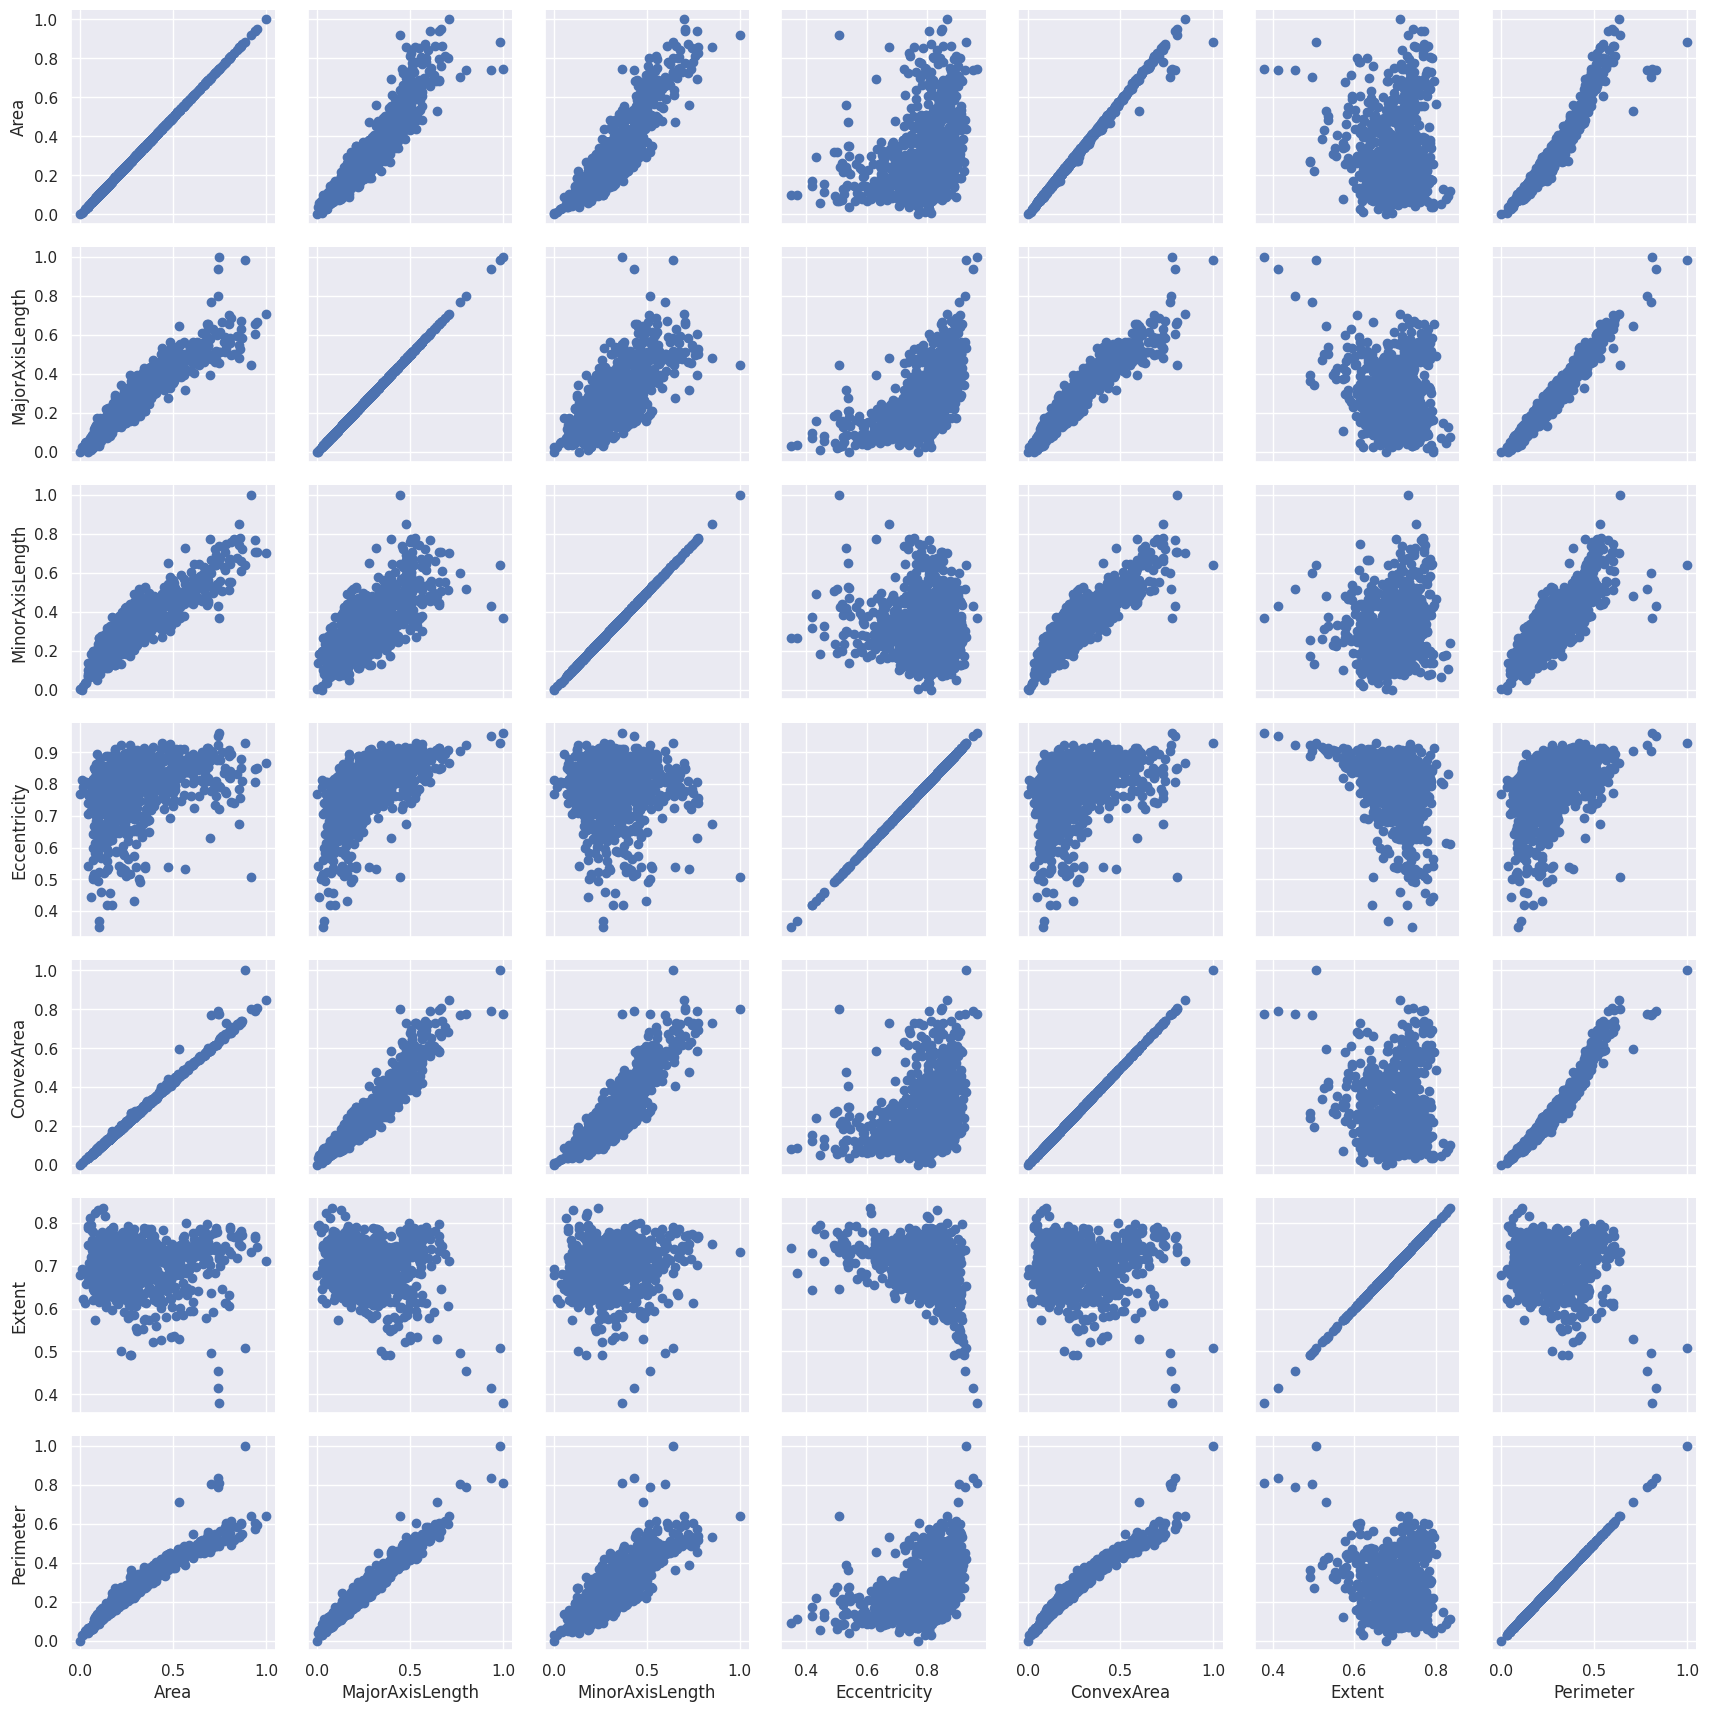

In [ ]:
#sacatter plot
sns.set(style='darkgrid')
columns=sns.PairGrid(data.drop("Class",axis=1))
columns.map(plt.scatter)
plt.show()

Histogram

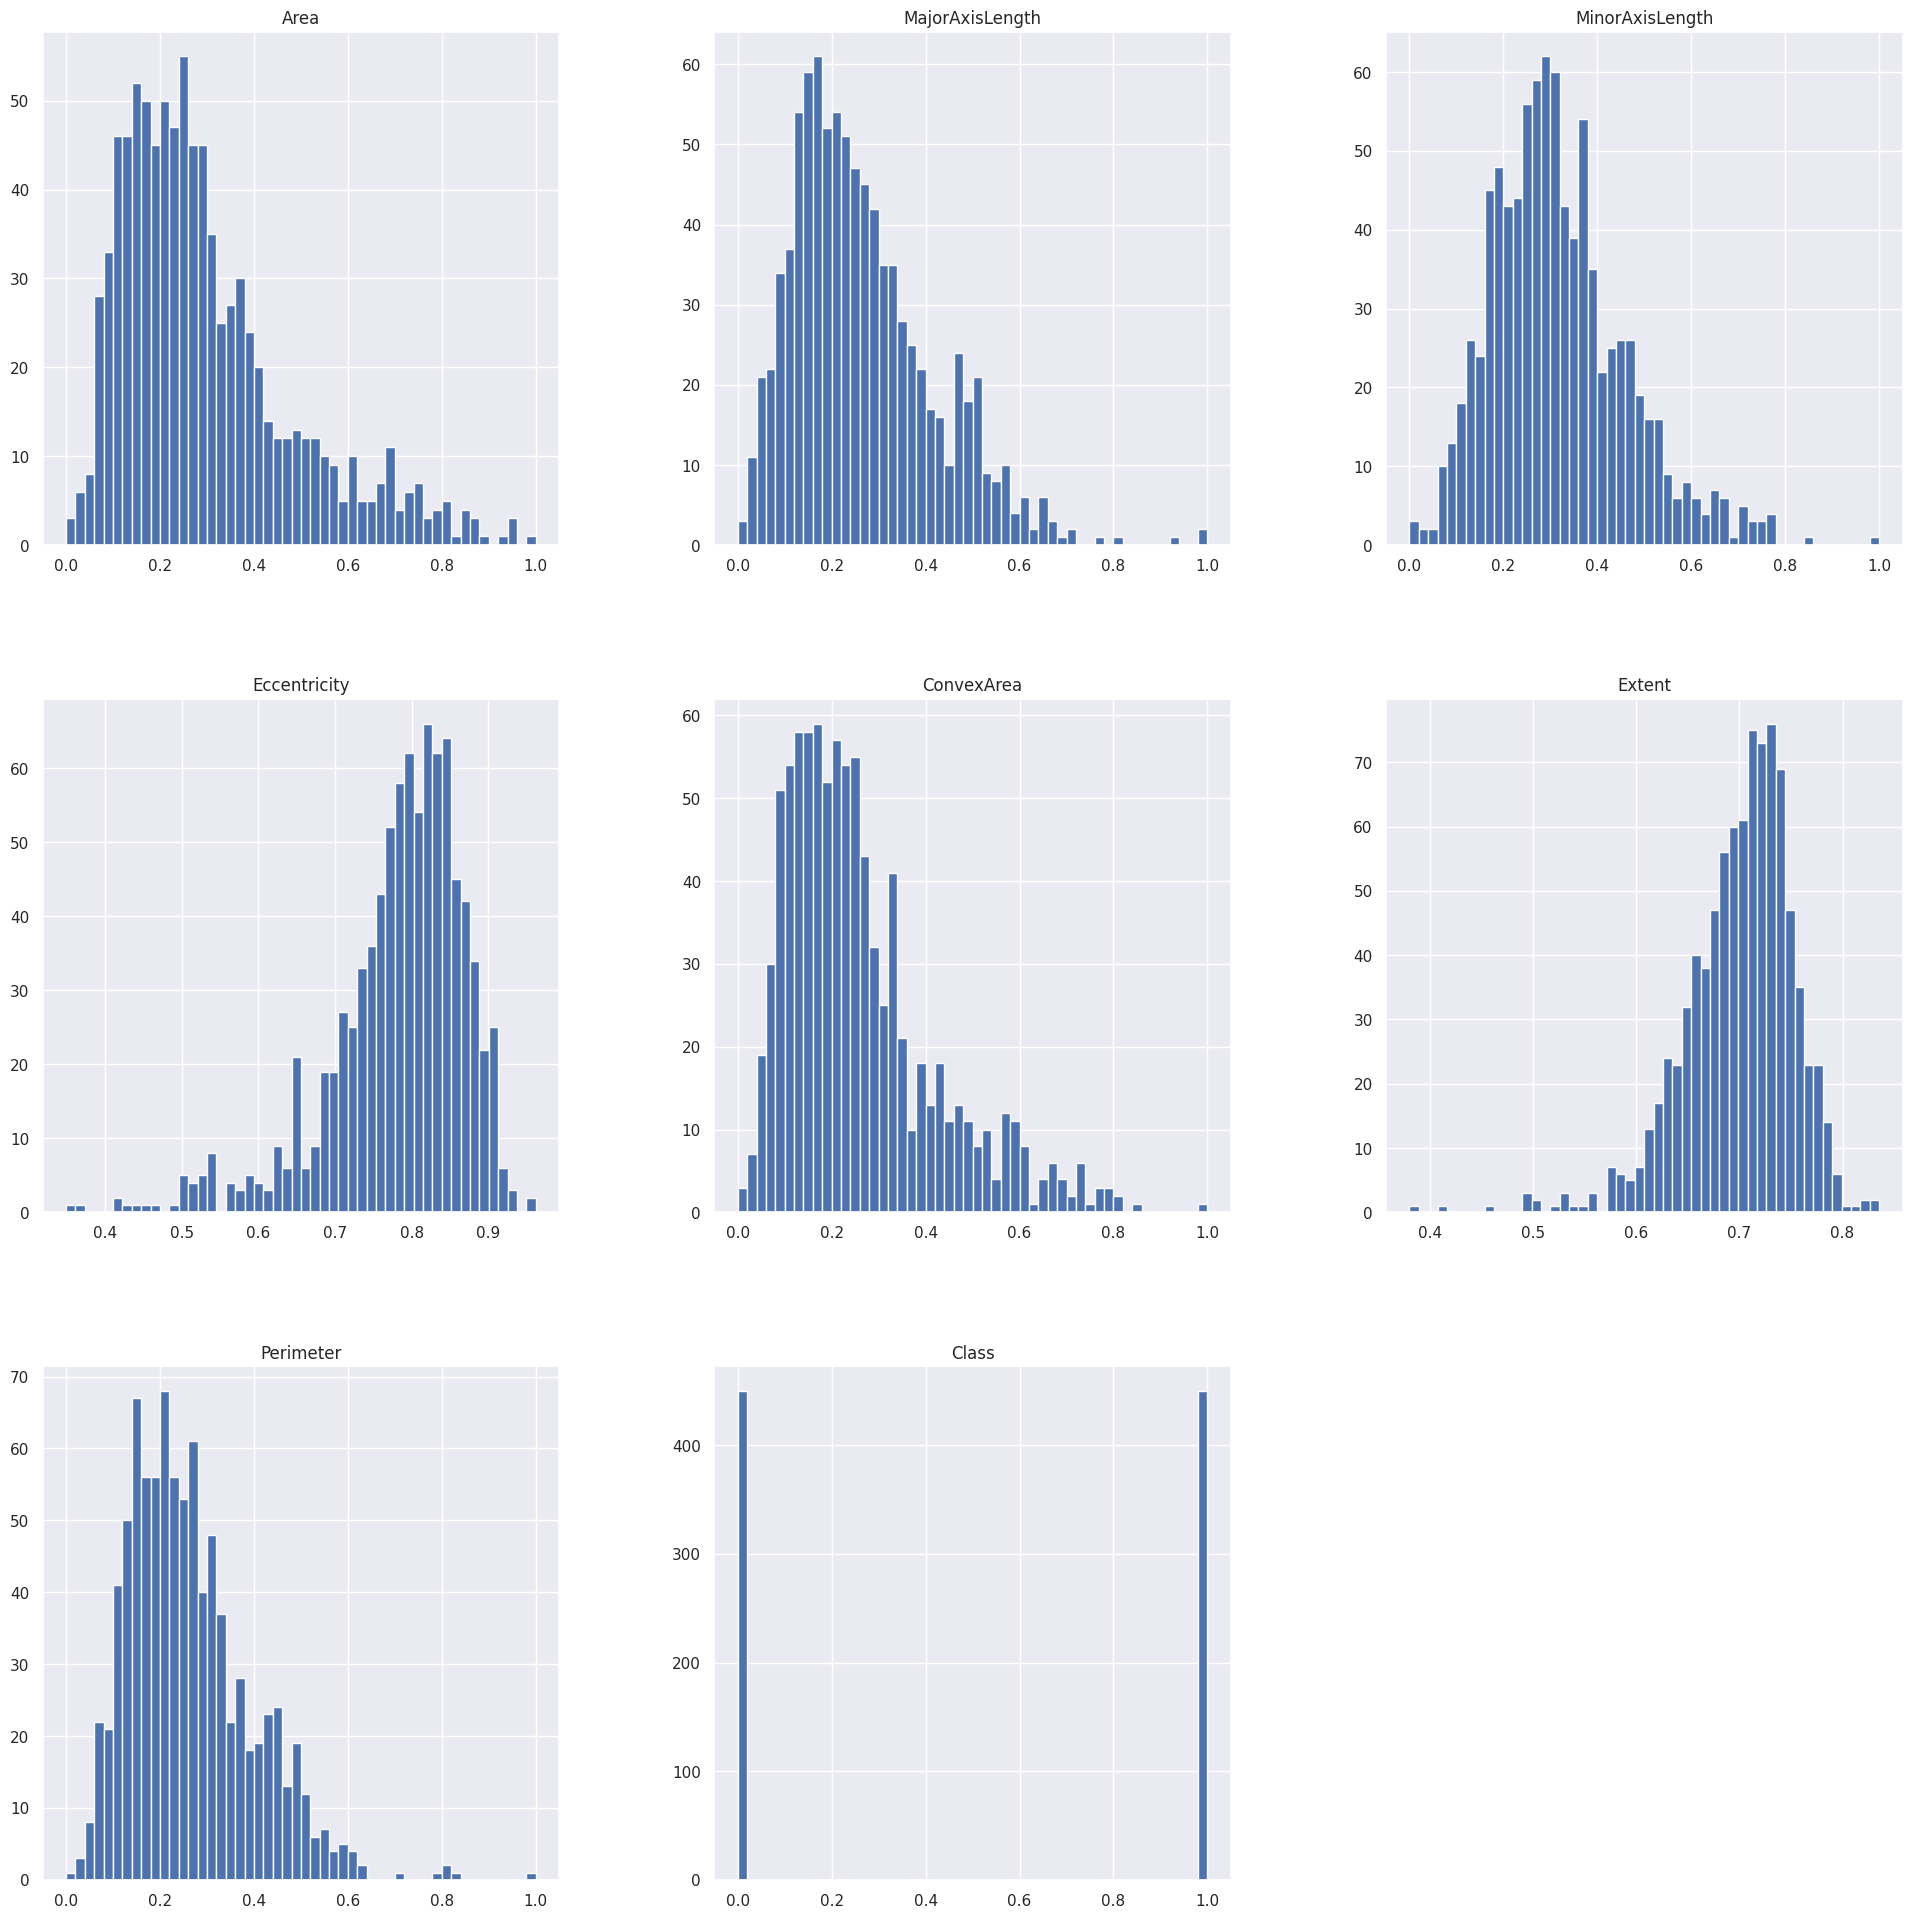

In [ ]:

data.hist(bins=50,figsize=(24,24))
plt.show()

Density Plot

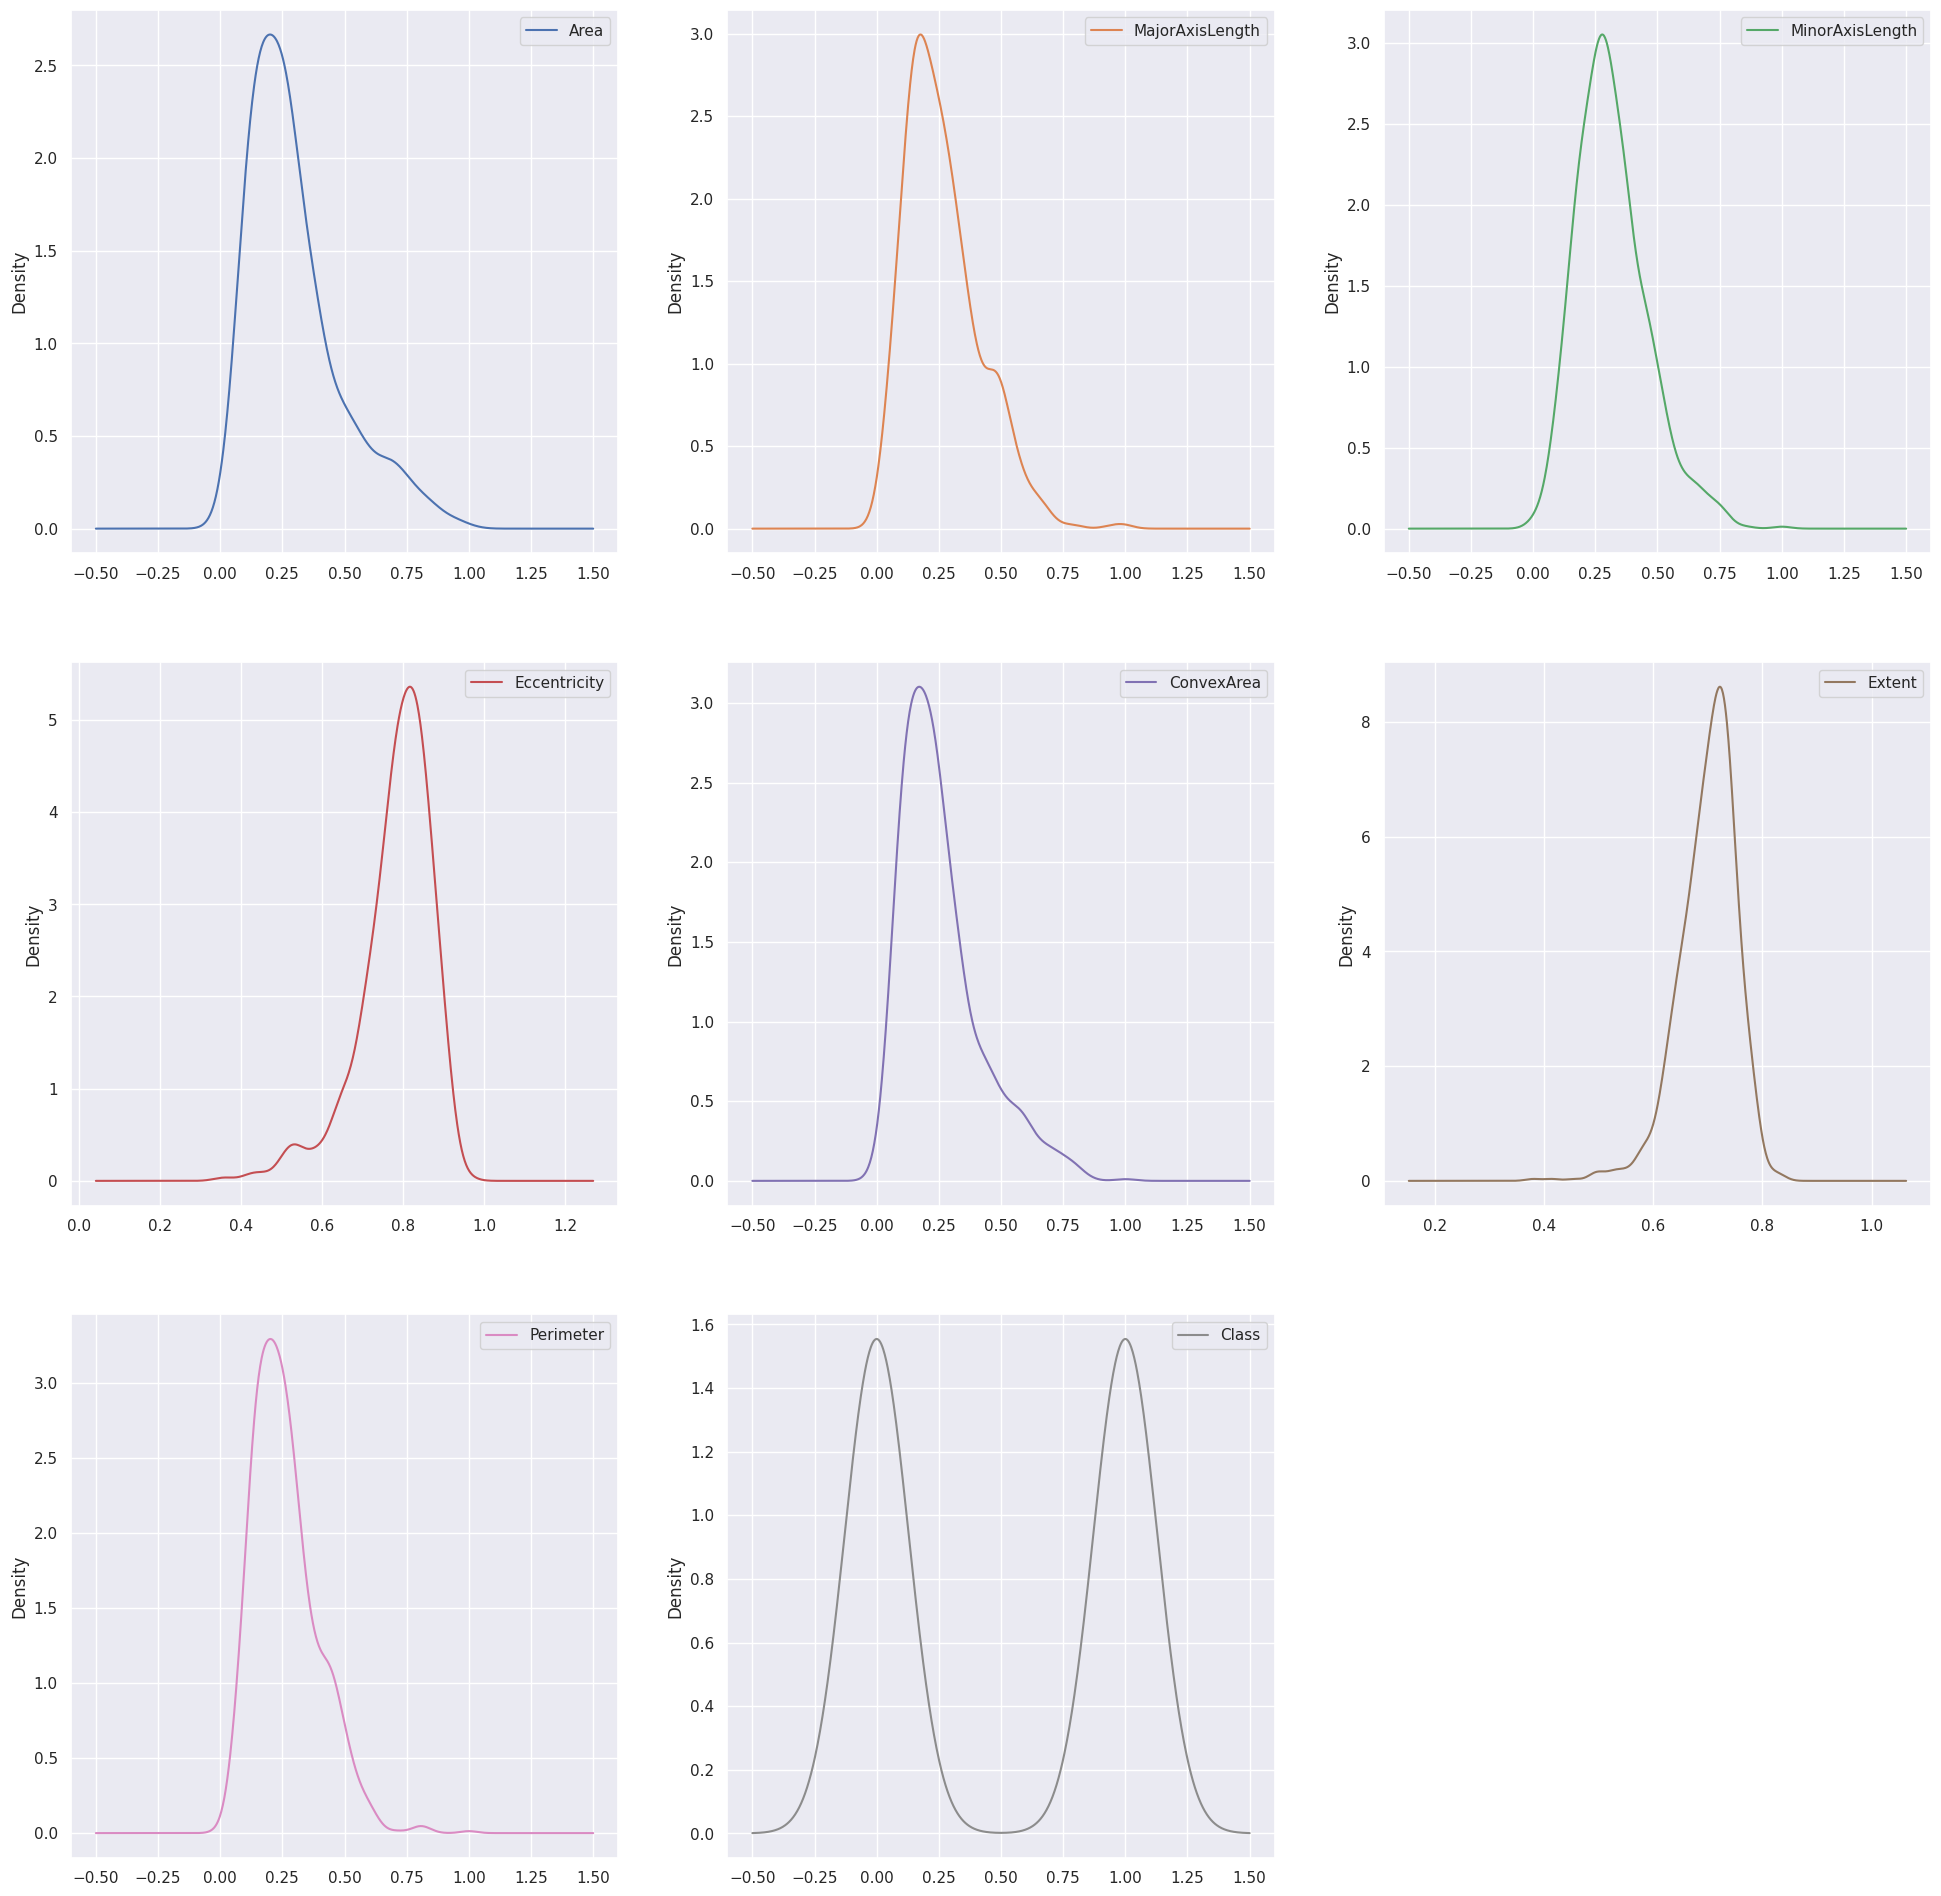

In [ ]:


data.plot(kind=('density'),subplots=True,layout=(3,3),figsize=(24,24),sharex=False)
plt.show()

Box Plot

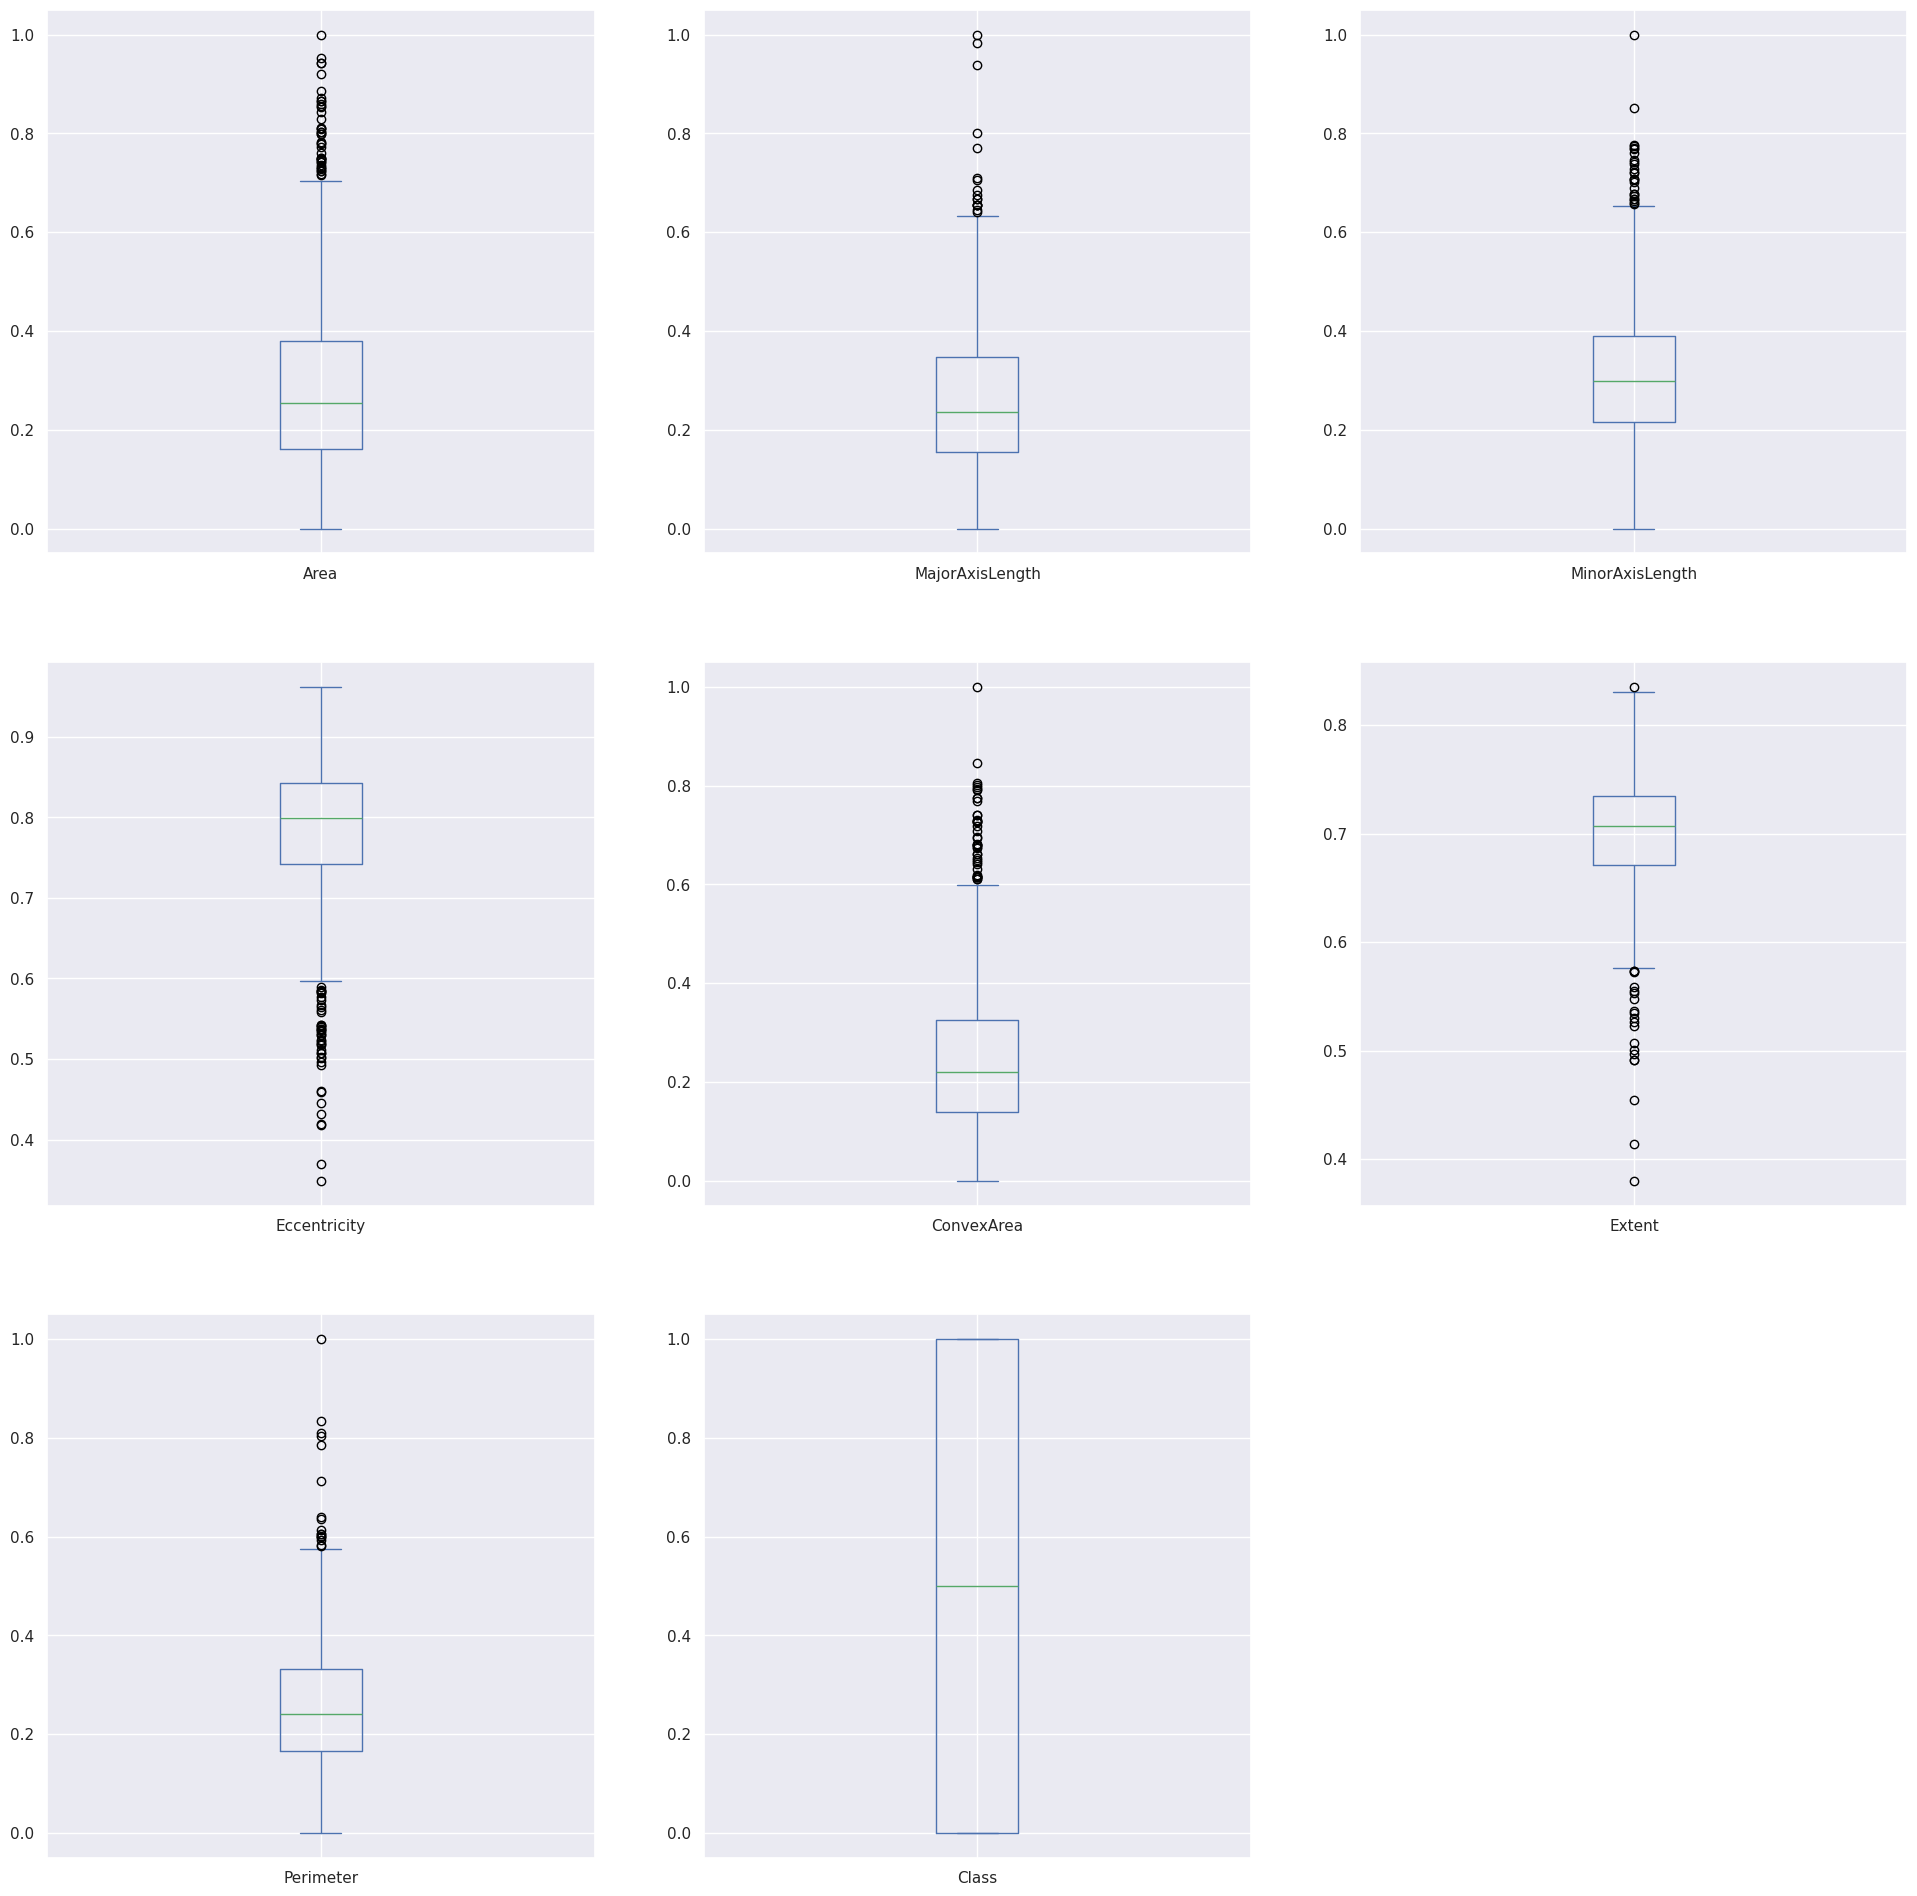

In [ ]:
data.plot(kind='box',layout=(3,3),subplots=True,figsize=(24,24))
plt.show()

Pair Plot

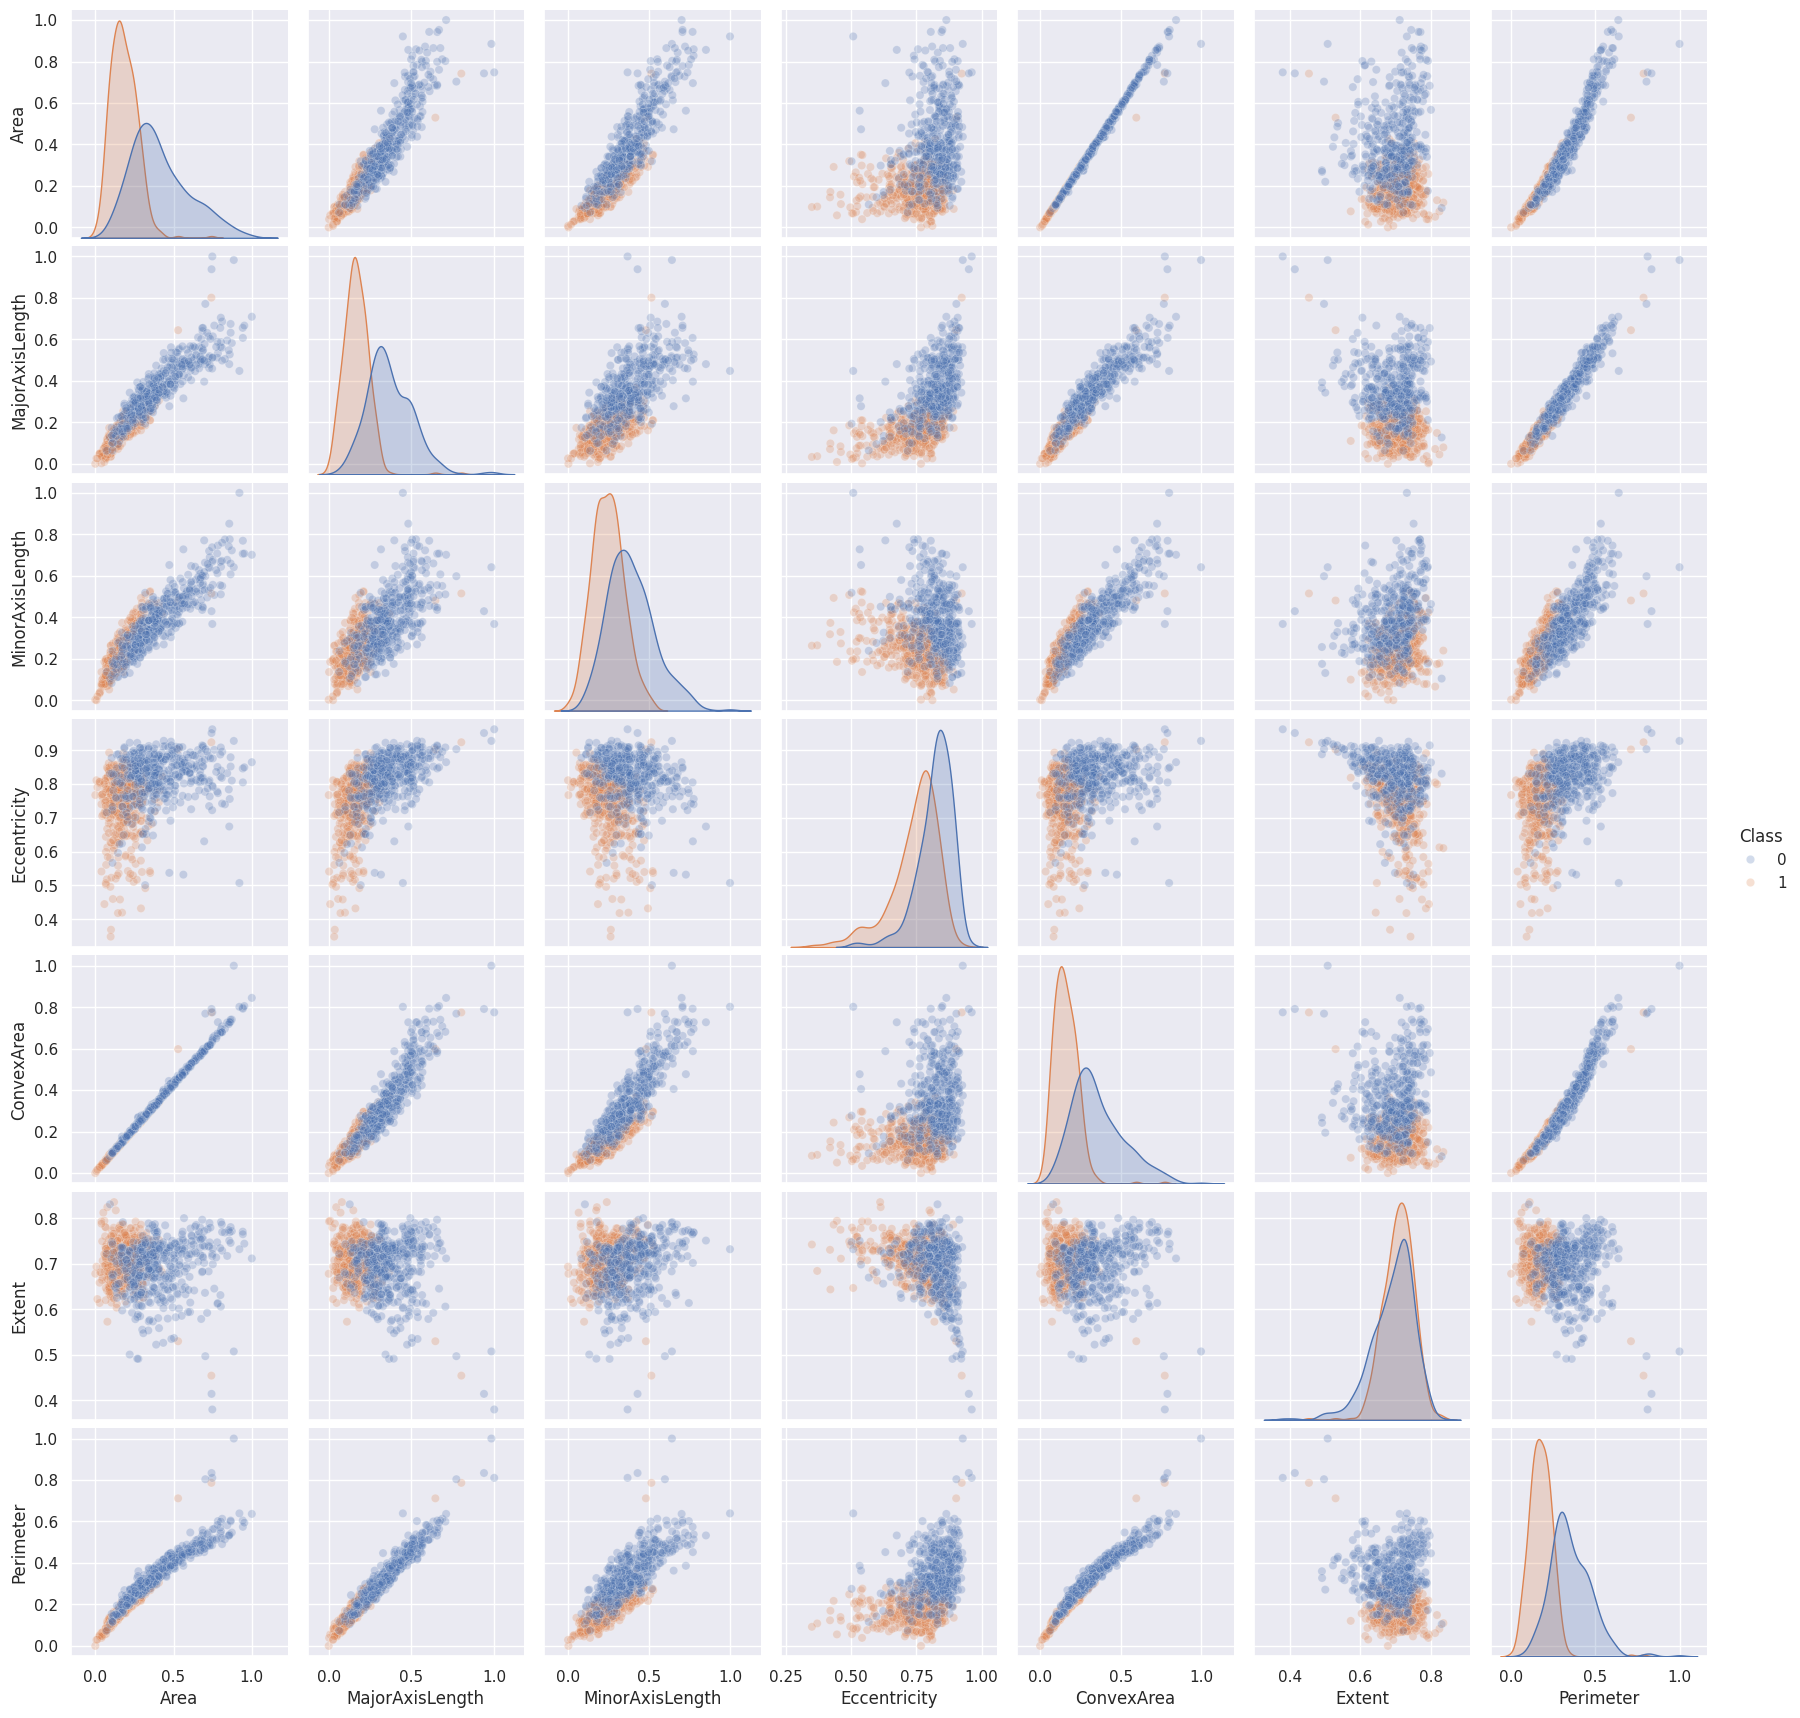

In [ ]:
sns.pairplot(data, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

Heat Map for Pearson and Spearman Correlation

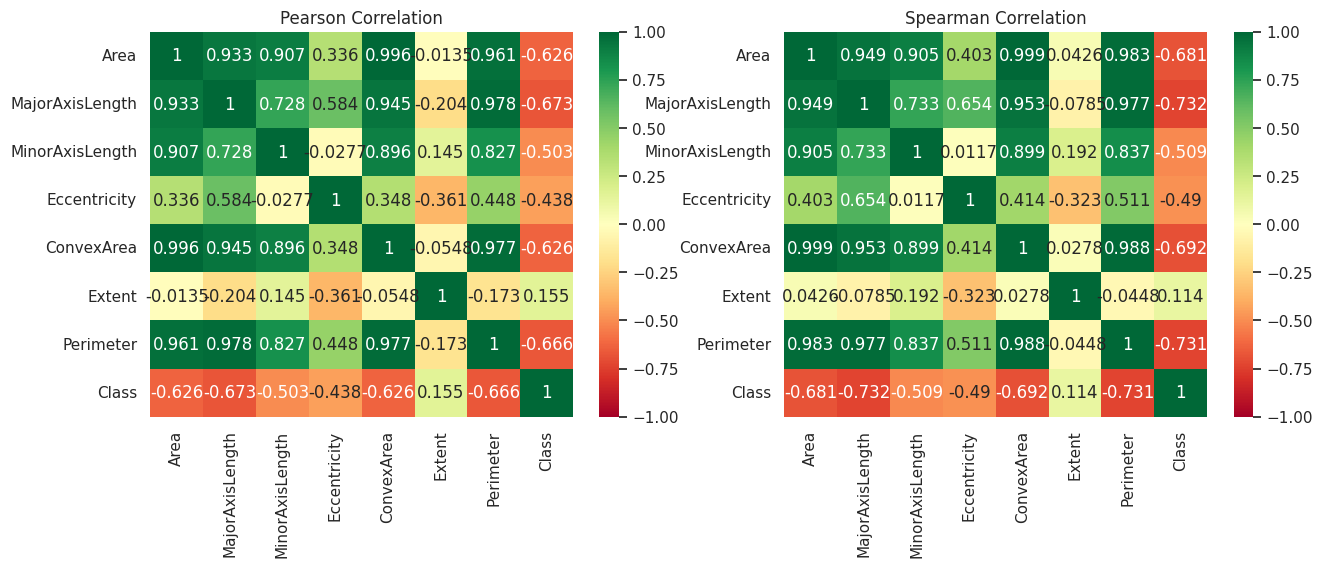

In [ ]:
corr_pearson = data.corr(method='pearson')  # Pearson Correlation
corr_spearman = data.corr(method='spearman') # Spearman Correlation


# Heat Map for Pearson Correlation
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

# Heat Map for Spearman Correlation

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

Train-Test Split

In [ ]:
X=data.drop("Class",axis=1)
Y=data["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(720, 7) (180, 7)
(720,) (180,)


### LogisticRegression



```
# This is formatted as code
```

Learning Curve for Logistic regression


In [ ]:

#  Hyperparameter grid for Logistic Regression
lr_grid_param={
    'C':[0.001,0.1,1,10,100],
    'penalty':['l1','l2']
}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

best grid parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8388888888888889
f1score is : 0.8397790055248618
recall score is : 0.8837209302325582
precision score: 0.8


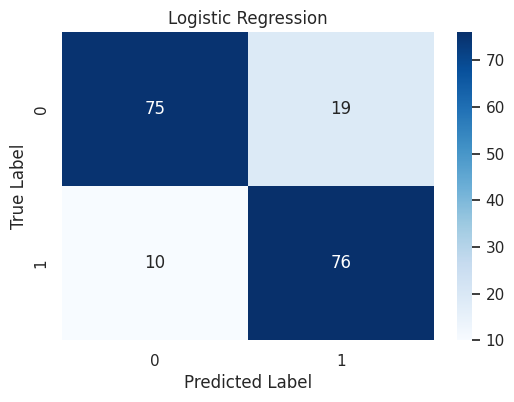

In [ ]:

from sklearn.metrics import confusion_matrix
lr_model=LogisticRegression(solver='lbfgs',random_state=0)

#  create gridsearchcv for logistic regression

lr_grid_search=GridSearchCV(lr_model,lr_grid_param, cv=5 , n_jobs=-1,return_train_score=True)

# Fit the model using LR
lr_grid_search.fit(X_train,y_train)

# get the best hyperparameters
best_lr_params = lr_grid_search.best_params_

print("best grid parameters:", best_lr_params)

#  train logistic with best hyperparameters

best_lr_model=LogisticRegression(solver='liblinear', random_state=0, **best_lr_params)
best_lr_model.fit(X_train,y_train)

# Calculate accuracy on the testing data for Logistic Regression

y_predict_test=best_lr_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict_test)
print("Accuracy:", accuracy_score(y_test, y_predict_test))
print("f1score is :",f1_score(y_test,y_predict_test))
print("recall score is :",recall_score(y_test,y_predict_test))
print("precision score:",precision_score(y_test,y_predict_test))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression')
plt.show()

Learning curve

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.inter

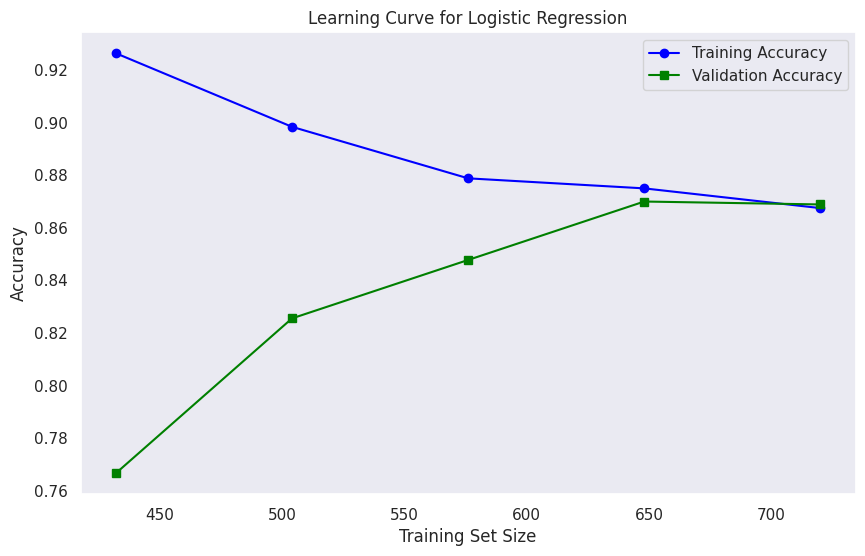

In [ ]:
# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    best_lr_model, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='green', marker='s')

# # Fill the area between mean ± std
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

# Add labels and legend
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

This learning curve suggests underfitting:

*Both the training and validation accuracies are relatively low.

*Validation accuracy improves with more data but does not close the gap significantly.

Let's try another models


Decision Tree

In [ ]:
#  Hyperparameter grid for Decision Tree

tree_params={"max_depth":[2,3,5,10,20,25,50,100],"criterion":[ "entropy"],"splitter":["best", "random"]}

best grid parameters: {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
Accuracy: 0.8055555555555556
f1 score is : 0.8148148148148148
recall score is : 0.8953488372093024
precision score: 0.7475728155339806


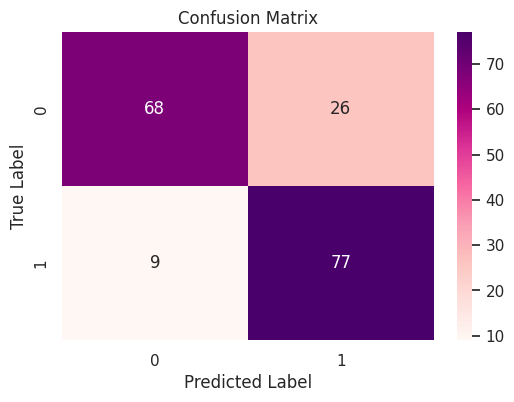

In [ ]:

from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

tr_model=DecisionTreeClassifier()

#  create gridsearchcv for DecisionTree

tr_grid_search=GridSearchCV(tr_model,tree_params, cv=5 , n_jobs=-1)

# Fit the model using LR
tr_grid_search.fit(X_train,y_train)

# get the best hyperparameters
best_tr_params = tr_grid_search.best_params_

print("best grid parameters:", best_tr_params)

#  train model with best hyperparameters

best_tr_model=DecisionTreeClassifier( random_state=2, **best_tr_params)
best_tr_model.fit(X_train,y_train)
# Calculate accuracy on the testing data for Logistic Regression
y_predict=best_tr_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("f1 score is :",f1_score(y_test,y_predict))
print("recall score is :",recall_score(y_test,y_predict))
print("precision score:",precision_score(y_test,y_predict))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

|--- MajorAxisLength <= 0.26
|   |--- Perimeter <= 0.14
|   |   |--- class: 1
|   |--- Perimeter >  0.14
|   |   |--- class: 1
|--- MajorAxisLength >  0.26
|   |--- MajorAxisLength <= 0.31
|   |   |--- class: 0
|   |--- MajorAxisLength >  0.31
|   |   |--- class: 0



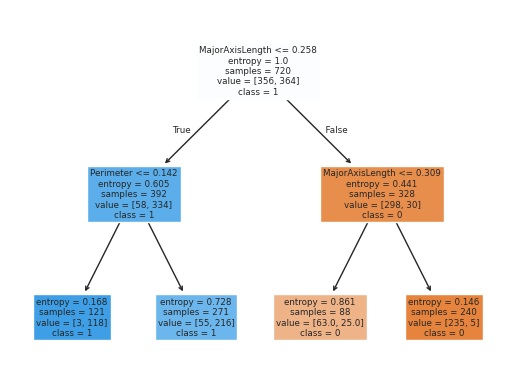

Feature: Area, Importance: 0.0
Feature: MajorAxisLength, Importance: 0.9501059720035144
Feature: MinorAxisLength, Importance: 0.0
Feature: Eccentricity, Importance: 0.0
Feature: ConvexArea, Importance: 0.0
Feature: Extent, Importance: 0.0
Feature: Perimeter, Importance: 0.049894027996485645


In [ ]:
from sklearn.tree import plot_tree, export_text
names=["Area",	"MajorAxisLength","MinorAxisLength",	"Eccentricity",	"ConvexArea",	"Extent",	"Perimeter"]
print(export_text(best_tr_model, feature_names=names))
plot_tree(best_tr_model, feature_names=names, class_names=["0","1"], filled=True)
plt.show()
# plot_tree(best_tr_model)
feature_importances = best_tr_model.feature_importances_
for feature, importance in zip(names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")


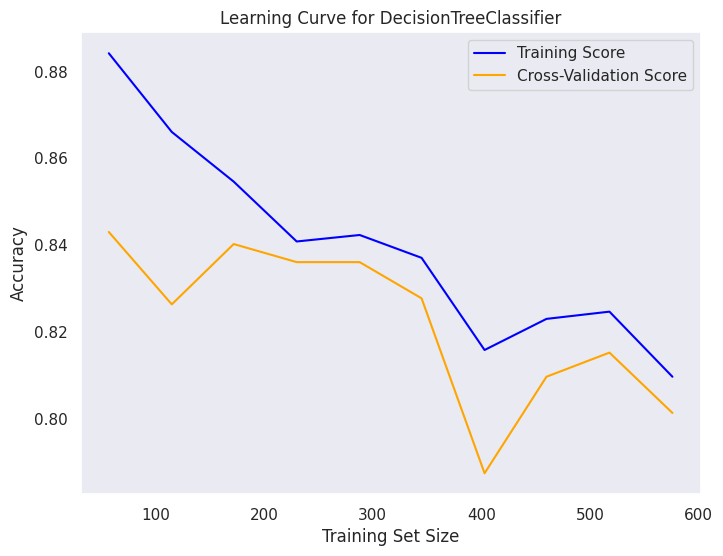

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    best_tr_model,
    X_train,
    y_train,
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)  # Vary training sizes from 10% to 100%
)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, valid_mean, label="Cross-Validation Score", color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for DecisionTreeClassifier")
plt.legend()
plt.grid()
plt.show()


The training accuracy is much higher than the validation accuracy, suggesting the model is fitting the training data too closely and not generalizing well.

Support vector Machine

In [ ]:
#  Hyperparameter grid for SVM

svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

best parameter for svm: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy: 0.8888888888888888
f1 score is : 0.898989898989899
recall score is : 0.9270833333333334
precision score: 0.8725490196078431


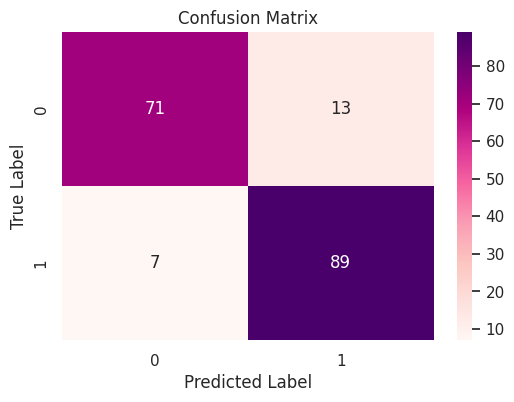

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,recall_score,precision_score

svm=SVC() #SVC(support vector classifire) is classifier that uses's SVM to saprate data into the different classes

#Create GridSearchCV for SVM
svm_grid_search=GridSearchCV(svm , svm_param_grid,cv=5,n_jobs=-1)

# Fit the model on training data
svm_grid_search.fit(X_train,y_train)

# Get the best hyperparameters for SVM
best_svm_params=svm_grid_search.best_params_
print('best parameter for svm:',best_svm_params)

#  Train SVM with the best hyperparameters
best_svm_model=SVC(random_state=0, **best_svm_params)
best_svm_model.fit(X_train,y_train)

# calculate accuracy score for testing data.
y_predict=best_svm_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("f1 score is :",f1_score(y_test,y_predict))
print("recall score is :",recall_score(y_test,y_predict))
print("precision score:",precision_score(y_test,y_predict))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Learning Curve

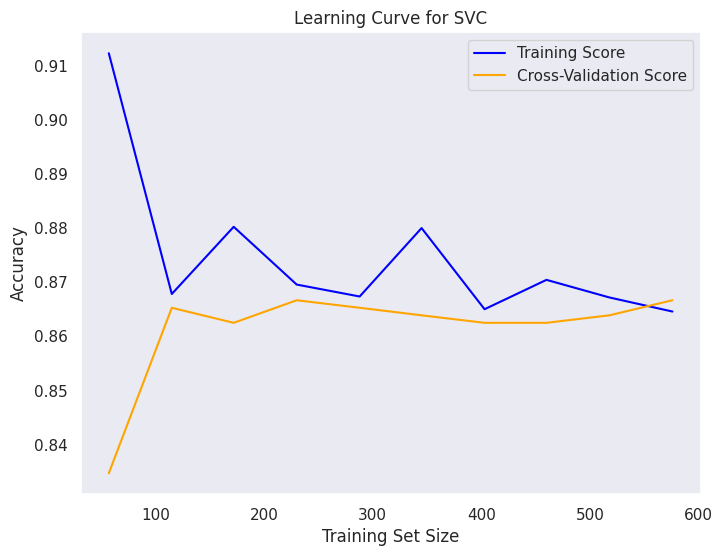

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    best_svm_model,
    X_train,
    y_train,
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)  # Vary training sizes from 10% to 100%
)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, valid_mean, label="Cross-Validation Score", color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for SVC")
plt.legend()
plt.grid()
plt.show()


Random Forest

In [ ]:
#  Hyperparameter grid for Random Forest

forest_params = [{'max_depth': list(range(10, 15)),'criterion':["gini", "entropy", "log_loss"],
                  'max_features':["sqrt", "log2", "None"]}]



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

best parameter for svm: {'criterion': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt'}
Accuracy: 0.8888888888888888
f1 score is : 0.9029126213592233
recall score is : 0.96875
precision score: 0.8454545454545455


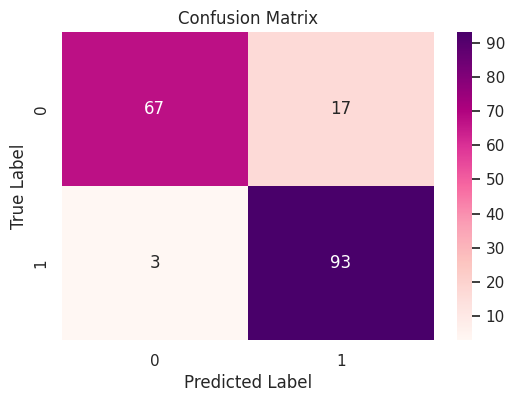

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

rfc=RandomForestClassifier()

#Create GridSearchCV
rfc_grid_search=GridSearchCV( rfc ,forest_params,cv=5,n_jobs=-1)

# Fit the model on training data
rfc_grid_search.fit(X_train,y_train)

# Get the best hyperparameters for RandomForestClassifier
best_rfc_params=rfc_grid_search.best_params_
print('best parameter for svm:',best_rfc_params)

#  Train model with the best hyperparameters
best_rfc_model=RandomForestClassifier(random_state=0, **best_rfc_params)
best_rfc_model.fit(X_train,y_train)

# calculate accuracy score
y_predict=best_rfc_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("f1 score is :",f1_score(y_test,y_predict))
print("recall score is :",recall_score(y_test,y_predict))
print("precision score:",precision_score(y_test,y_predict))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")

    plt.plot(train_sizes, valid_mean, label="Cross-Validation Score", color="orange")

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

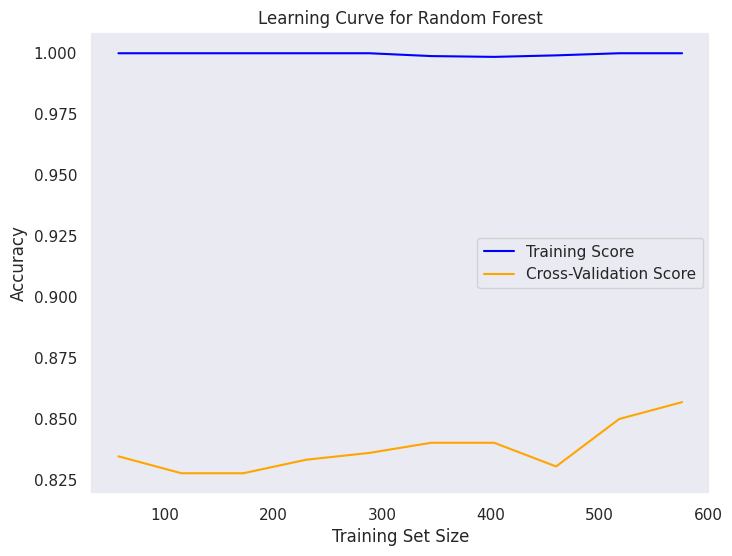

In [ ]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_model = RandomForestClassifier(random_state=2)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = RandomForestClassifier(random_state=2, **rf_grid.best_params_)
plot_learning_curve(best_rf_model, X_train, y_train, "Learning Curve for Random Forest")


KNeighborsClassifier

In [ ]:
knn_params={"n_neighbors":[1,2,3,4,5],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
             }

best parameter for svm: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.8666666666666667
f1 score is : 0.8846153846153846
recall score is : 0.9583333333333334
precision score: 0.8214285714285714


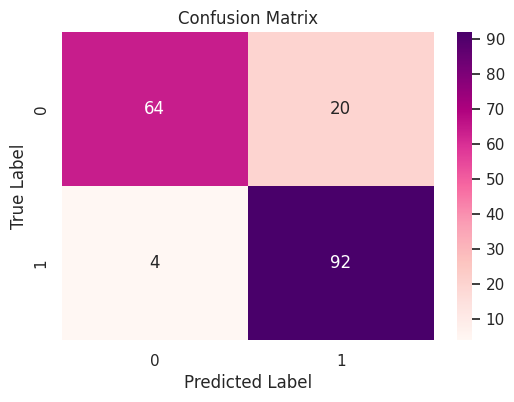

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

knn=KNeighborsClassifier()

#Create GridSearchCV
knn_grid_search=GridSearchCV( knn ,knn_params,cv=5,n_jobs=-1)

# Fit the model on training data
knn_grid_search.fit(X_train,y_train)

# Get the best hyperparameters
best_knn_params=knn_grid_search.best_params_
print('best parameter for svm:',best_knn_params)

#  Train model with the best hyperparameters
best_knn_model=KNeighborsClassifier( **best_knn_params)
best_knn_model.fit(X_train,y_train)

# calculate accuracy score
y_predict=best_knn_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("f1 score is :",f1_score(y_test,y_predict))
print("recall score is :",recall_score(y_test,y_predict))
print("precision score:",precision_score(y_test,y_predict))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

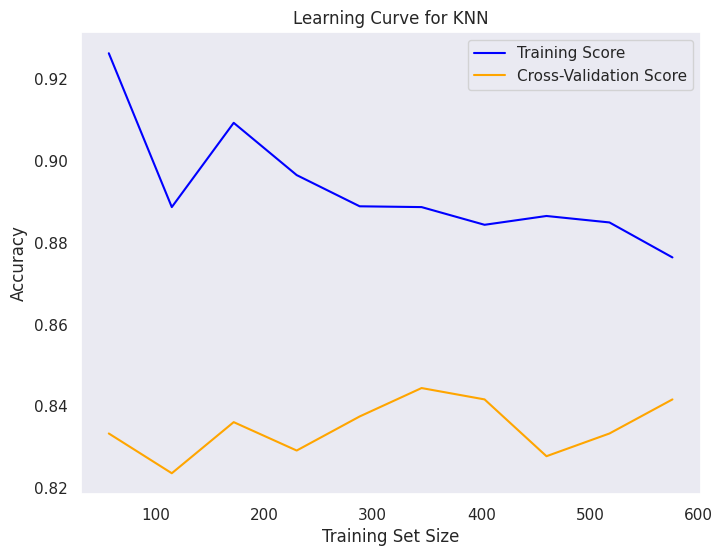

In [ ]:

knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn_model = KNeighborsClassifier(**knn_grid.best_params_)
plot_learning_curve(best_knn_model, X_train, y_train, "Learning Curve for KNN")

#
 Gradient Boosting

In [ ]:
Gradiant_params={"loss":["log_loss", "exponential"],'learning_rate':[0.0,0.1,0.001,1],"n_estimators":[0,1,10,100]
                 }

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

best parameter for GB: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 1}
Accuracy: 0.8722222222222222
f1 score is : 0.8866995073891626
recall score is : 0.9375
precision score: 0.8411214953271028


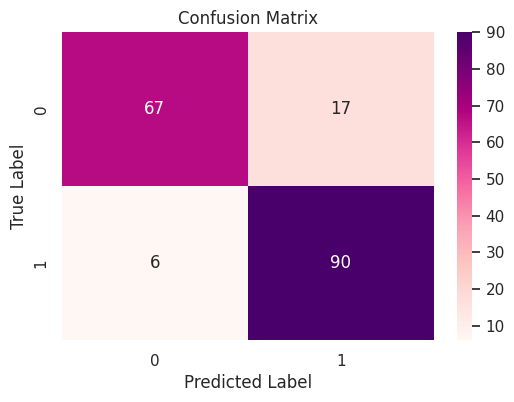

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

GB=GradientBoostingClassifier()

#Create GridSearchCV for GradientBoostingClassifier
GB_grid_search=GridSearchCV( GB ,Gradiant_params,cv=5,n_jobs=-1)

# Fit the model on training data
GB_grid_search.fit(X_train,y_train)

# Get the best hyperparameters
best_GB_params=GB_grid_search.best_params_
print('best parameter for GB:',best_GB_params)

#  Train model with the best hyperparameters
best_GB_model=GradientBoostingClassifier(random_state=0, **best_GB_params)
best_GB_model.fit(X_train,y_train)

# calculate accuracy score
y_predict=best_GB_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("f1 score is :",f1_score(y_test,y_predict))
print("recall score is :",recall_score(y_test,y_predict))
print("precision score:",precision_score(y_test,y_predict))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

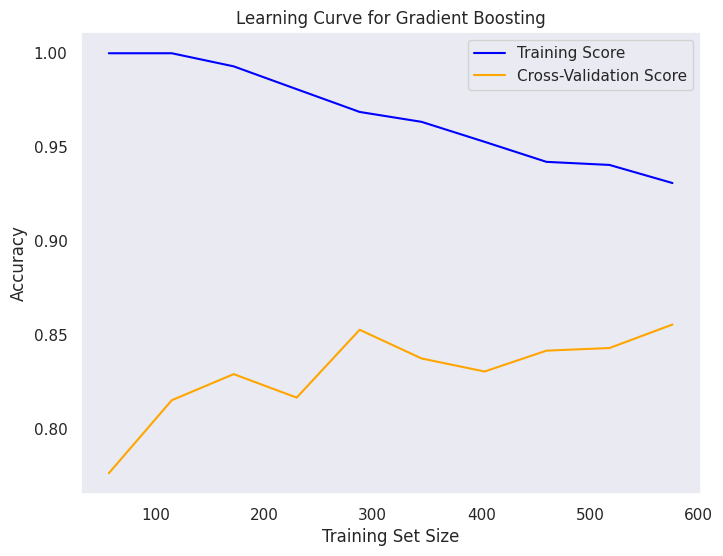

In [ ]:
gb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
gb_model = GradientBoostingClassifier(random_state=2)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb_model = GradientBoostingClassifier(random_state=2, **gb_grid.best_params_)
plot_learning_curve(best_gb_model, X_train, y_train, "Learning Curve for Gradient Boosting")

AdaBoost

In [ ]:
ada_params={'n_estimators':[1,10,50,100],"learning_rate":[0,1,0.001,0.01],"algorithm":['SAMME', 'SAMME.R']}

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

best parameter for AB: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}
Accuracy: 0.8777777777777778
f1 score is : 0.8932038834951457
recall score is : 0.9583333333333334
precision score: 0.8363636363636363


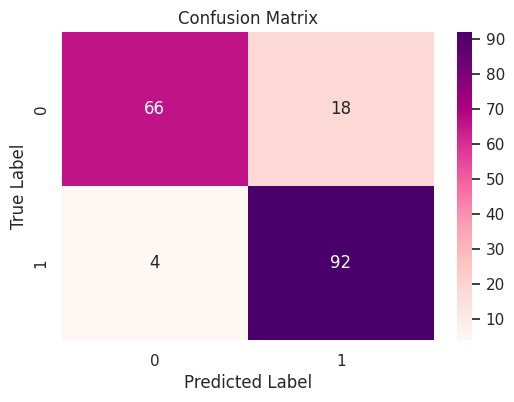

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

AB=AdaBoostClassifier()
#Create GridSearchCV
AB_grid_search=GridSearchCV( AB ,ada_params,cv=5,n_jobs=-1)

# Fit the model on training data
AB_grid_search.fit(X_train,y_train)

# Get the best hyperparameters
best_AB_params=AB_grid_search.best_params_
print('best parameter for AB:',best_AB_params)

#  Train adaboost with the best hyperparameters
best_AB_model=AdaBoostClassifier(random_state=0, **best_AB_params)
best_AB_model.fit(X_train,y_train)

# calculate accuracy score
ab_pred=best_AB_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,ab_pred)
print("Accuracy:", accuracy_score(y_test, ab_pred))
print("f1 score is :",f1_score(y_test,ab_pred))
print("recall score is :",recall_score(y_test,ab_pred))
print("precision score:",precision_score(y_test,ab_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

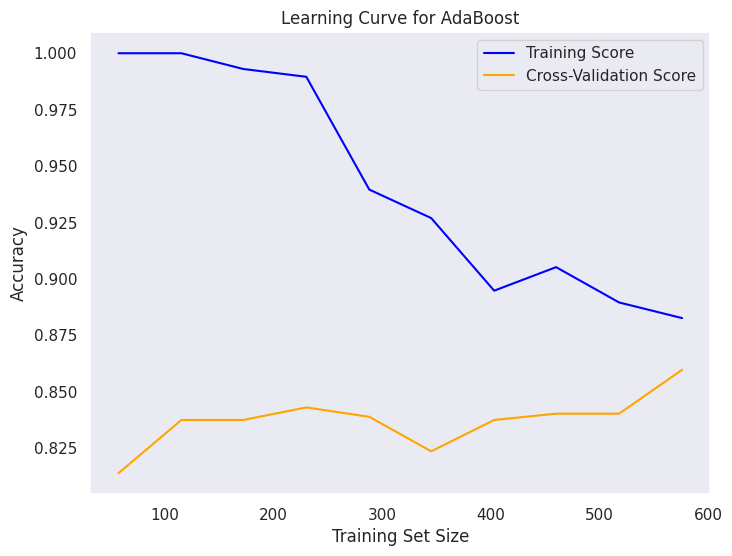

In [ ]:
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
ada_model = AdaBoostClassifier(random_state=2)
ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(X_train, y_train)
best_ada_model = AdaBoostClassifier(random_state=2, **ada_grid.best_params_)
plot_learning_curve(best_ada_model, X_train, y_train, "Learning Curve for AdaBoost")

Gaussian Naive Bayes

Accuracy: 0.85
f1 score is : 0.8732394366197183
recall score is : 0.96875
precision score: 0.7948717948717948


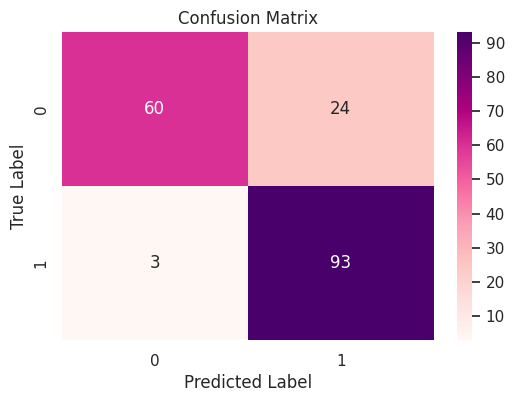

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

GNB=GaussianNB()
GNB.fit(X_train, y_train)
gnb_pred = GNB.predict(X_test)
# matrix=confusion_matrix(y_test,gnb_pred)
print("Accuracy:", accuracy_score(y_test, gnb_pred))
print("f1 score is :",f1_score(y_test,gnb_pred))
print("recall score is :",recall_score(y_test,gnb_pred))
print("precision score:",precision_score(y_test,gnb_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,gnb_pred), annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

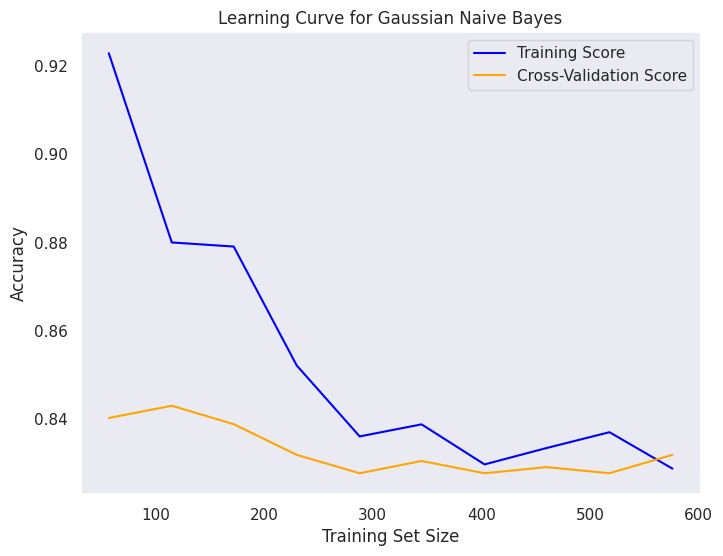

In [ ]:
gnb_model = GaussianNB()
plot_learning_curve(gnb_model, X_train, y_train, "Learning Curve for Gaussian Naive Bayes")


Linear SVC

Accuracy: 0.9
f1 score is : 0.9117647058823529
recall score is : 0.96875
precision score: 0.8611111111111112


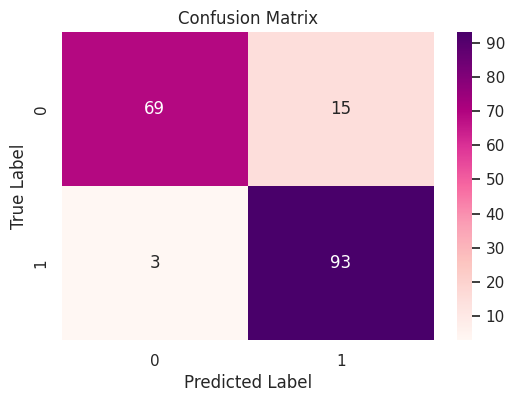

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

lsvc=LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_test)
confusion_matrix=confusion_matrix(y_test,lsvc_pred)
print("Accuracy:", accuracy_score(y_test, lsvc_pred))
print("f1 score is :",f1_score(y_test,lsvc_pred))
print("recall score is :",recall_score(y_test,lsvc_pred))
print("precision score:",precision_score(y_test,lsvc_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdPu')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Bagging Classifier

Accuracy: 0.8777777777777778
f1 score is : 0.8877551020408163
recall score is : 0.90625
precision score: 0.87
recall score is : 0.90625
precision score: 0.87


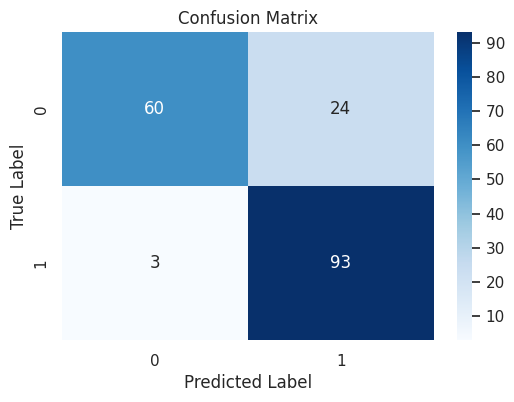

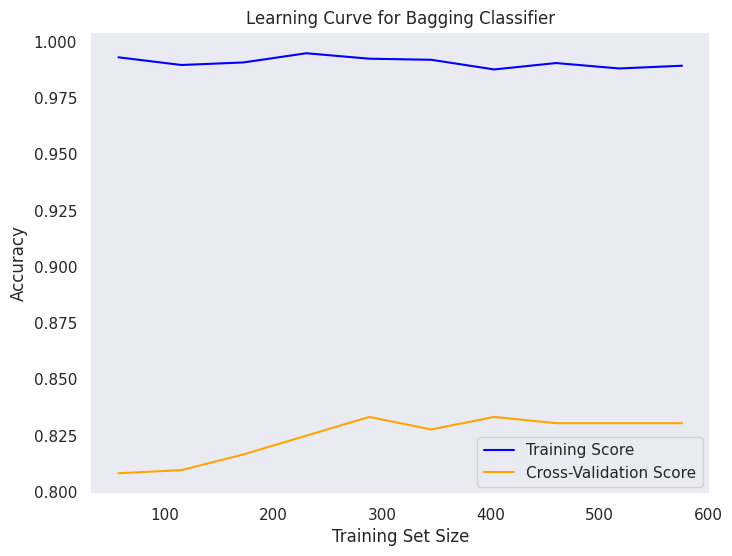

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

bcr=BaggingClassifier()
bcr.fit(X_train, y_train)
bcr_pred = bcr.predict(X_test)
# matrix=confusion_matrix(y_test,gnb_pred)
print("Accuracy:", accuracy_score(y_test, bcr_pred))
print("f1 score is :",f1_score(y_test,bcr_pred))
print("recall score is :",recall_score(y_test,bcr_pred))
print("precision score:",precision_score(y_test,bcr_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,gnb_pred), annot=True, fmt='d', cmap='Blues')  # fmt='d' forces integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("recall score is :",recall_score(y_test,bcr_pred))
print("precision score:",precision_score(y_test,bcr_pred))
plt.show()
plot_learning_curve(bcr, X_train, y_train, "Learning Curve for Bagging Classifier")


##Neural Network Models

MLP


Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        84
           1       0.92      0.93      0.92        96

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180

f_1 score is : 0.9222797927461139
recall score is : 0.9270833333333334
precision score: 0.9175257731958762


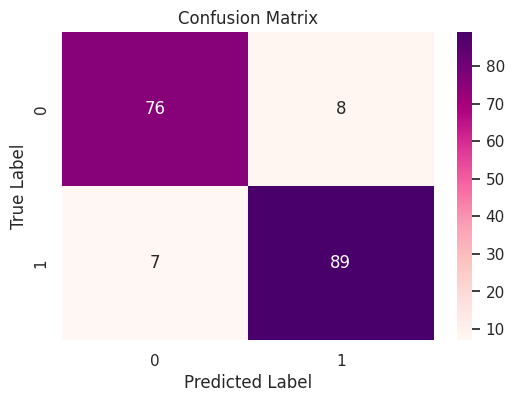

In [ ]:


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# # Feature Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)



# Train the Model
Mlp = MLPClassifier(hidden_layer_sizes=(1500,200), activation='relu', solver='adam', alpha=0.01, random_state=42)

Mlp.fit(X_train, y_train)

# Predictions
Mlp_pred = Mlp.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, Mlp_pred))
print(classification_report(y_test, Mlp_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, Mlp_pred), annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("f_1 score is :",f1_score(y_test,Mlp_pred))
print("recall score is :",recall_score(y_test,Mlp_pred ))
print("precision score:",precision_score(y_test,Mlp_pred ))
plt.show()



Accuracy: 0.8222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        84
           1       0.90      0.75      0.82        96

    accuracy                           0.82       180
   macro avg       0.83      0.83      0.82       180
weighted avg       0.83      0.82      0.82       180

F1 Score: 0.8181818181818182
Recall Score: 0.75
Precision Score: 0.9


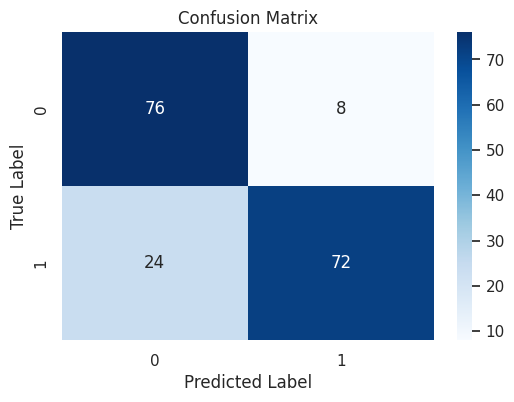

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Optional: Grid Search for Best Hyperparameters
do_grid_search = False  # Set to True if you want to tune

if do_grid_search:
    param_grid = {
        'hidden_layer_sizes': [(200,), (300, 200), (200, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'early_stopping': [True]
    }

    grid = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), param_grid,
                        cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best Parameters:", grid.best_params_)
    best_model = grid.best_estimator_
else:
    best_model = MLPClassifier(hidden_layer_sizes=(200, 150),
                               activation='relu',
                               solver='adam',
                               alpha=0.01,
                               early_stopping=True,
                               max_iter=1000,
                               random_state=42)
    best_model.fit(X_train, y_train)

# Predictions
Mlp_pred = best_model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, Mlp_pred))
print("Classification Report:\n", classification_report(y_test, Mlp_pred))
print("F1 Score:", f1_score(y_test, Mlp_pred, average='binary'))
print("Recall Score:", recall_score(y_test, Mlp_pred, average='binary'))
print("Precision Score:", precision_score(y_test, Mlp_pred, average='binary'))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, Mlp_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


cnn

Shape of X before scaling: (900, 7)
Final shape of X for Conv1D: (900, 7, 1)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8078 - loss: 0.6047 - val_accuracy: 0.8500 - val_loss: 0.3519 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.3480 - val_accuracy: 0.8611 - val_loss: 0.3364 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8817 - loss: 0.2993 - val_accuracy: 0.8556 - val_loss: 0.3411 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.3510 - val_accuracy: 0.8500 - val_loss: 0.3497 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.3189 - val_accuracy: 0.8611 - val_loss: 0.3433 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.3411 - val_accuracy: 0.8611 - val_loss: 0.3420 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8902 - loss: 0.3142 - val_accuracy: 0.86

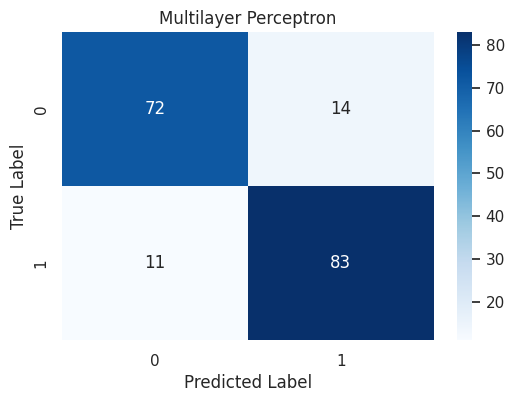

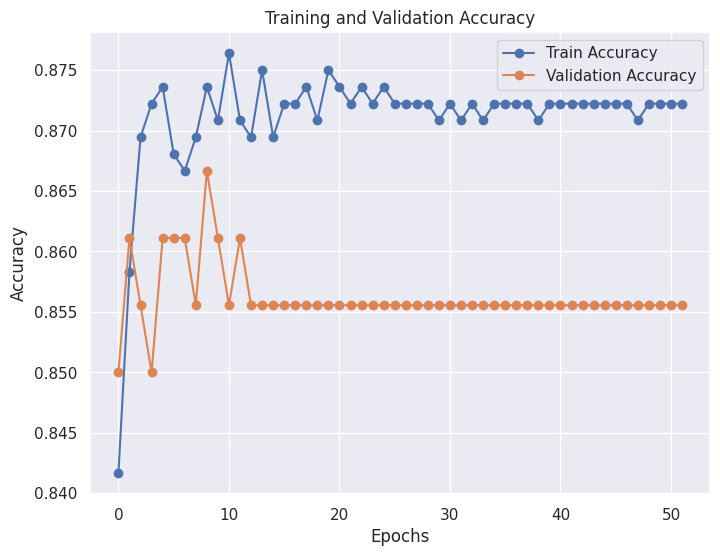

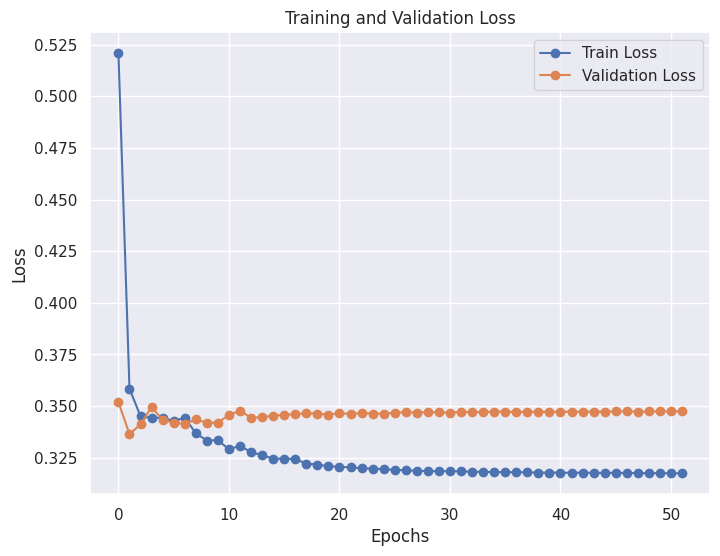

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



# Assume last column is target
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# # Encode categorical target if needed
# if Y.dtype == 'object':
#     le = LabelEncoder()
#     Y = le.fit_transform(Y)

# ---------------------------
# Scale & Reshape
# ---------------------------
print("Shape of X before scaling:", X.shape)
X = X.reshape(X.shape[0], -1)  # Ensure 2D
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape to 3D for Conv1D
print("Final shape of X for Conv1D:", X.shape)

# ---------------------------
# Split into Train/Test Sets
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ---------------------------
# Build the Conv1D Model
# ---------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),
    # tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),

    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------------------------
# Callbacks
# ---------------------------
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# ---------------------------
# Train the Model
# ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# ---------------------------
# Predict and Evaluate
# ---------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Multilayer Perceptron')
plt.show()

# Training vs Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()


Shape of X before scaling: (900, 7)
Final shape of X for Conv1D: (900, 7, 1)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7246 - loss: 0.9730

23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.7358 - loss: 0.9556 - val_accuracy: 0.8500 - val_loss: 0.9924 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8609 - loss: 0.7376 - val_accuracy: 0.8389 - val_loss: 0.9082 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8712 - loss: 0.6234 - val_accuracy: 0.8389 - val_loss: 0.8388 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8838 - loss: 0.5525 - val_accuracy: 0.8500 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8512 - loss: 0.5543 - val_accuracy: 0.8500 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8674 - loss: 0.5170 - val_accuracy: 0.8500 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8929 - loss: 0.4432 - val_accuracy: 0

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8697 - loss: 0.4664 - val_accuracy: 0.8556 - val_loss: 0.6356 - learning_rate: 0.0010
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8681 - loss: 0.4199 - val_accuracy: 0.8500 - val_loss: 0.5959 - learning_rate: 0.0010
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8874 - loss: 0.3687 - val_accuracy: 0.8500 - val_loss: 0.5806 - learning_rate: 0.0010
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8629 - loss: 0.4022

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8631 - loss: 0.4018 - val_accuracy: 0.8611 - val_loss: 0.5415 - learning_rate: 0.0010
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8830 - loss: 0.3779 - val_accuracy: 0.8500 - val_loss: 0.5125 - learning_rate: 0.0010
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8556 - loss: 0.3835 - val_accuracy: 0.8556 - val_loss: 0.4739 - learning_rate: 0.0010
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8723 - loss: 0.3616 - val_accuracy: 0.8556 - val_loss: 0.4698 - learning_rate: 0.0010
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8707 - loss: 0.3714 - val_accuracy: 0.8500 - val_loss: 0.4418 - learning_rate: 0.0010
Epoch 16/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8709 - loss: 0.3467 - val_accuracy: 0.8556 - val_loss: 0.4439 - learning_rate: 0.0010
Epoch 17/100
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8448 - loss: 0.3608

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8469 - loss: 0.3588 - val_accuracy: 0.8667 - val_loss: 0.4026 - learning_rate: 0.0010
Epoch 18/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8929 - loss: 0.3227 - val_accuracy: 0.8500 - val_loss: 0.4162 - learning_rate: 0.0010
Epoch 19/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8582 - loss: 0.3525 - val_accuracy: 0.8500 - val_loss: 0.3895 - learning_rate: 0.0010
Epoch 20/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8953 - loss: 0.3191 - val_accuracy: 0.8444 - val_loss: 0.3818 - learning_rate: 0.0010
Epoch 21/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8408 - loss: 0.3802 - val_accuracy: 0.8556 - val_loss: 0.3663 - learning_rate: 0.0010
Epoch 22/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8647 - loss: 0.3299 - val_accuracy: 0.8556 - val_loss: 0.3686 - learning_rate: 0.0010
Epoch 23/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8864 - loss: 0.2928 - val_accuracy

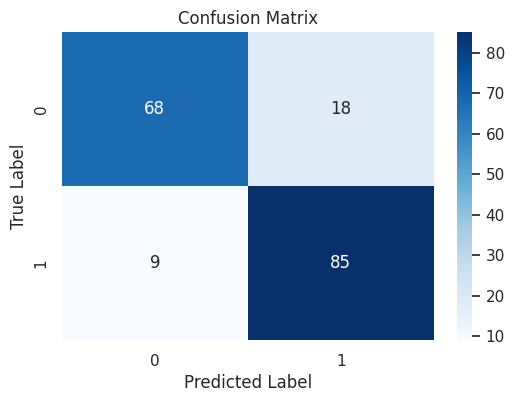

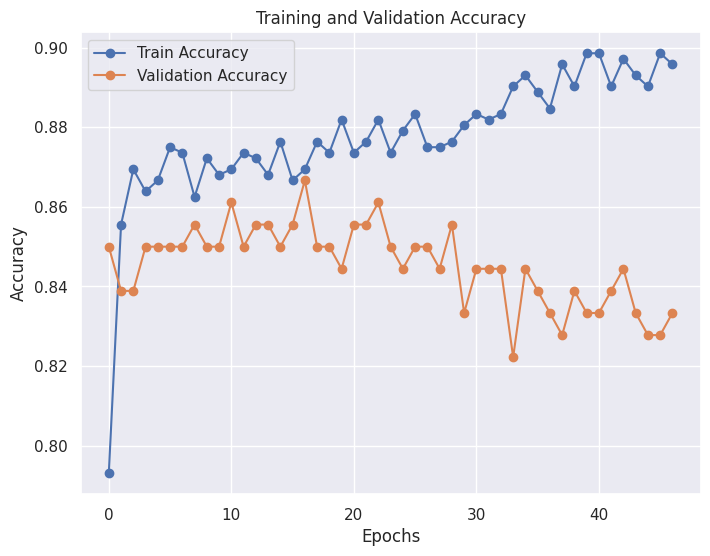

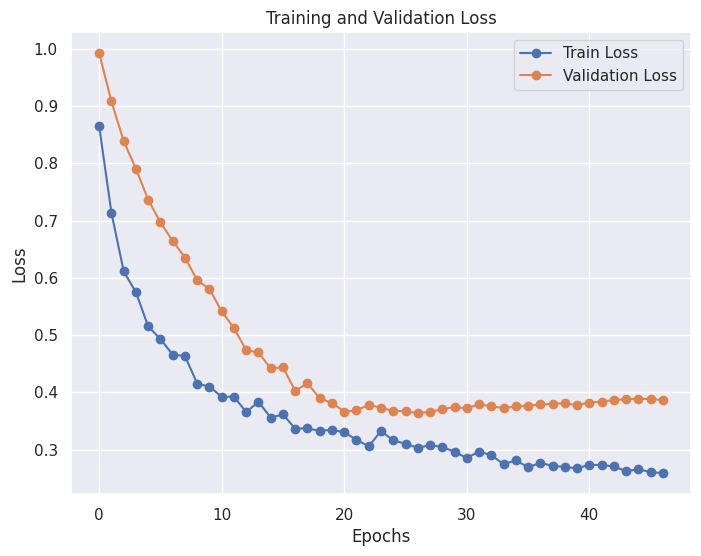

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers

# ---------------------------
# Load your dataset here (assume `data` is already available)
# ---------------------------
# Example: data = pd.read_csv('your_data.csv')

# Assume last column is target
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Encode categorical target if needed
if Y.dtype == 'object':
    le = LabelEncoder()
    Y = le.fit_transform(Y)

# ---------------------------
# Scale & Reshape
# ---------------------------
print("Shape of X before scaling:", X.shape)
X = X.reshape(X.shape[0], -1)  # Ensure 2D
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape to 3D for Conv1D
print("Final shape of X for Conv1D:", X.shape)

# ---------------------------
# Split into Train/Test Sets
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ---------------------------
# Class Weights (for Imbalanced Data)
# ---------------------------
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# ---------------------------
# Build the Improved Conv1D Model
# ---------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='same', input_shape=(X.shape[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ---------------------------
# Callbacks
# ---------------------------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# ---------------------------
# Train the Model
# ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# ---------------------------
# Predict and Evaluate
# ---------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Training vs Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()
